# Alpha Diversity Analysis

In [1]:
library("dplyr")
library("gridExtra")
library("plotrix")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [28]:
# Opening the file with alpha diversity metric Faiths PD and Observed OTUs
sigtab = read.csv("adiv_pd.txt",sep = "\t", row.names = 1)
sigtab = as.data.frame.matrix(sigtab) 
sigtab$Time = as.factor(sigtab$Time)
sigtab

,PD_whole_tree,chao1,observed_otus,Treat,Time,individual
,<dbl>,<dbl>,<int>,<chr>,<fct>,<int>
A01P0A,118.1525,1755.888,1087,P,0,1
A01P4A,136.3558,1959.757,1286,P,4,1
A02P0A,125.8227,1734.252,1158,P,0,2
A02P4A,128.4522,1844.950,1184,P,4,2
A03P0B,117.3737,1475.532,1008,P,0,3
A03P4B,134.1725,1970.320,1342,P,4,3
A04P0B,138.2460,1870.902,1315,P,0,4
A05P0C,120.1843,1627.641,1071,P,0,5
A05P4C,134.8702,1930.846,1267,P,4,5


In [34]:
# Converting the Metric columns to numeric
sigtab$PD_whole = as.numeric(sigtab$PD_whole_tree)
sigtab$observed = as.numeric(sigtab$observed_otus)
sigtab$Time = as.numeric(sigtab$Time)

In [35]:
# Subset the PLacebo and Letrozole groups 
placebo = subset(sigtab, Treat != 'L')
letrozole = subset(sigtab, Treat != 'P')

## Pearsons Correlations

In [46]:
print("Faith's PD for placebo")
print("#p value is 0.0032  #r value is 0.3772668")
cor.test(x = placebo$PD_whole_tree, y = placebo$Time, method="pearson")

print("Faith's PD for letrozole")
print("#p value is 0.9878 #r value is 0.002016013")
cor.test(x = letrozole$PD_whole_tree, y = letrozole$Time, method="pearson")

print("Observed Otus for placebo")
print("#p value is 0.0045  #r value is 0.3644626")
cor.test(x = placebo$observed_otus, y = placebo$Time, method="pearson")

print("Observed Otus for letrozole")
print("#p value is 0.9823 #r value is 0.0.002918877")
cor.test(x = letrozole$observed_otus, y = letrozole$Time, method="pearson")

[1] "Faith's PD for placebo"
[1] "#p value is 0.0032  #r value is 0.3772668"



	Pearson's product-moment correlation

data:  placebo$PD_whole_tree and placebo$Time
t = 3.0756, df = 57, p-value = 0.003224
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1341445 0.5775511
sample estimates:
      cor 
0.3772668 


[1] "Faith's PD for letrozole"
[1] "#p value is 0.9878 #r value is 0.002016013"



	Pearson's product-moment correlation

data:  letrozole$PD_whole_tree and letrozole$Time
t = 0.015354, df = 58, p-value = 0.9878
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2520377  0.2558098
sample estimates:
        cor 
0.002016013 


[1] "Observed Otus for placebo"
[1] "#p value is 0.0045  #r value is 0.3644626"



	Pearson's product-moment correlation

data:  placebo$observed_otus and placebo$Time
t = 2.9549, df = 57, p-value = 0.004541
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1195369 0.5675720
sample estimates:
      cor 
0.3644626 


[1] "Observed Otus for letrozole"
[1] "#p value is 0.9823 #r value is 0.0.002918877"



	Pearson's product-moment correlation

data:  letrozole$observed_otus and letrozole$Time
t = 0.02223, df = 58, p-value = 0.9823
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2511920  0.2566534
sample estimates:
        cor 
0.002918877 


In [40]:
print("#For faith's PD placebo")
placebo_aov_PD <- aov(placebo$PD_whole_tree ~ factor(placebo$Time) + Error(placebo$individual),data=placebo)
summary(placebo_aov_PD) #P = 0.003

print("#For observed Otu placebo")
placebo_aov_otu <- aov(placebo$observed_otus ~ factor(placebo$Time) + Error(placebo$individual),data=placebo)
summary(placebo_aov_otu) #P = 0.001

print("#For faith's PD letrozole")
letrozole_aov_PD <- aov(letrozole$PD_whole_tree ~ factor(letrozole$Time) + Error(letrozole$individual),data=letrozole)
summary(letrozole_aov_PD) #P = 0.494

print("#For observed Otu letrozole")
letrozole_aov_otu <- aov(letrozole$observed_otus ~ factor(letrozole$Time) + Error(letrozole$individual),data=letrozole)
summary(letrozole_aov_otu) #P = 0.533

[1] "#For faith's PD placebo"



Error: placebo$individual
                     Df Sum Sq Mean Sq
factor(placebo$Time)  1  4.158   4.158

Error: Within
                     Df Sum Sq Mean Sq F value  Pr(>F)   
factor(placebo$Time)  5   2474   494.8   4.033 0.00362 **
Residuals            52   6380   122.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For observed Otu placebo"



Error: placebo$individual
                     Df Sum Sq Mean Sq
factor(placebo$Time)  1   3254    3254

Error: Within
                     Df  Sum Sq Mean Sq F value  Pr(>F)   
factor(placebo$Time)  5  581234  116247   4.674 0.00134 **
Residuals            52 1293153   24868                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For faith's PD letrozole"



Error: letrozole$individual
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  82.04   82.04               

Error: Within
                       Df Sum Sq Mean Sq F value Pr(>F)
factor(letrozole$Time)  5    715   143.0    0.89  0.494
Residuals              53   8512   160.6               

[1] "#For observed Otu letrozole"



Error: letrozole$individual
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1   1858    1858               

Error: Within
                       Df  Sum Sq Mean Sq F value Pr(>F)
factor(letrozole$Time)  5  152790   30558   0.831  0.533
Residuals              53 1948676   36767               

## Plotting our models

In [88]:
e <- ggplot(data = placebo, aes(x = Time, y = PD_whole_tree, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 40, ymax = 90), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 62.5 ,label = "LM: r = 0.377\np = 0.003\n RM-ANOVA\n p= 0.003") +
    theme_classic() +
    xlab("Week") + ylab("Diveristy (Faith's PD)") + ggtitle("Placebo")

f <- ggplot(data = letrozole, aes(x = Time, y = PD_whole_tree, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 40, ymax = 90), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 62.5 ,label = "LM: r = 0.002\np = 0.987\n RM-ANOVA\n p= 0.494") +
    theme_classic() +
    xlab("Week") + ylab("Diveristy (Faith's PD)") + ggtitle("Letrozole")

g <- ggplot(data = placebo, aes(x = Time, y = observed_otus, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 60, ymax = 500), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 272.5 ,label = "LM: r = 0.364\np = 0.004\n RM-ANOVA\n p= 0.001") +
    theme_classic() +
    xlab("Week") + ylab("Observed OTUs") + ggtitle("Placebo")

h <- ggplot(data = letrozole, aes(x = Time, y = observed_otus, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 60, ymax = 500), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 272.5 ,label = "LM: r = 0.002\np = 0.982\n RM-ANOVA\n p= 0.533") +
    theme_classic() +
    xlab("Week") + ylab("Observed OTUs") + ggtitle("Letrozole")

In [90]:
pdf("pdf_alpha_new.pdf", width = 8, height = 8) # Open a new pdf file
grid.arrange(e, f, g, h , nrow = 2)
dev.off() # Close the file

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

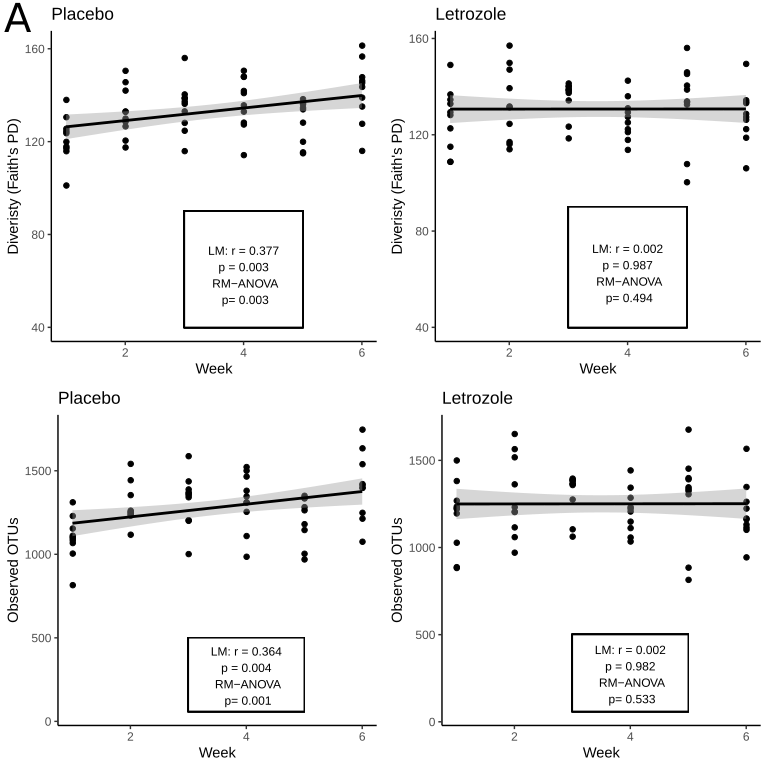